In [12]:
import pandas as pd

trans_df = pd.read_csv('Insider-Transactions-Data-Sets/2023q1_form345/NONDERIV_TRANS.tsv', sep='\t', low_memory=False)
sub_df = pd.read_csv('Insider-Transactions-Data-Sets/2023q1_form345/SUBMISSION.tsv', sep='\t', low_memory=False)

merged_df = pd.merge(trans_df, sub_df, on='ACCESSION_NUMBER')

In [13]:
import os
import pandas as pd

path = 'Insider-Transactions-Data-Sets/'

all_dirs = os.listdir(path)

def read_tsv(path, file_name):
    all_dirs = [name for name in os.listdir(path) if name.startswith('2')]

    dirs = [name for name in all_dirs]
    
    dfs = []
    for directory in dirs:
        tsv_path = os.path.join(path, directory, file_name)
        df = pd.read_csv(tsv_path, sep='\t', low_memory=False)
        dfs.append(df)

    df = pd.concat(dfs, ignore_index=True)

    return df


path = 'Insider-Transactions-Data-Sets/'

trans_df = read_tsv(path, 'NONDERIV_TRANS.tsv')
sub_df = read_tsv(path, 'SUBMISSION.tsv')

trans_df = pd.merge(trans_df, sub_df, on='ACCESSION_NUMBER')

trans_df.head()

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,SECURITY_TITLE,SECURITY_TITLE_FN,TRANS_DATE,TRANS_DATE_FN,DEEMED_EXECUTION_DATE,DEEMED_EXECUTION_DATE_FN,TRANS_FORM_TYPE,TRANS_CODE,...,DATE_OF_ORIG_SUB,NO_SECURITIES_OWNED,NOT_SUBJECT_SEC16,FORM3_HOLDINGS_REPORTED,FORM4_TRANS_REPORTED,DOCUMENT_TYPE,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL,REMARKS
0,0000076605-17-000122,1444527,Common Stock,NaN,28-SEP-2017,NaN,NaN,NaN,4.0,S,...,NaN,NaN,0,NaN,NaN,4,76605,PATRICK INDUSTRIES INC,PATK,NaN
1,0000076605-17-000122,1444526,Common Stock,NaN,27-SEP-2017,NaN,NaN,NaN,4.0,S,...,NaN,NaN,0,NaN,NaN,4,76605,PATRICK INDUSTRIES INC,PATK,NaN
2,0000076605-17-000121,1334551,Common Stock,NaN,27-SEP-2017,NaN,NaN,NaN,4.0,S,...,NaN,NaN,0,NaN,NaN,4,76605,PATRICK INDUSTRIES INC,PATK,NaN
3,0001140361-17-037034,1161256,Common Stock,NaN,27-SEP-2017,NaN,NaN,NaN,4.0,F,...,NaN,NaN,0,NaN,NaN,4,1535379,"Cloudera, Inc.",CLDR,NaN
4,0001140361-17-037033,1158175,Common Stock,NaN,27-SEP-2017,NaN,NaN,NaN,4.0,F,...,NaN,NaN,0,NaN,NaN,4,1535379,"Cloudera, Inc.",CLDR,NaN


In [14]:
features = ['ACCESSION_NUMBER', 'NONDERIV_TRANS_SK', 'TRANS_DATE', 'TRANS_CODE', 'TRANS_SHARES', 'TRANS_ACQUIRED_DISP_CD', 'SHRS_OWND_FOLWNG_TRANS', 'ISSUERCIK', 'ISSUERNAME', 'ISSUERTRADINGSYMBOL']
trans_df = trans_df[features]
trans_df['TRANS_DATE'] = pd.to_datetime(trans_df['TRANS_DATE'], errors='coerce')

trans_df.head()

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,TRANS_DATE,TRANS_CODE,TRANS_SHARES,TRANS_ACQUIRED_DISP_CD,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL
0,0000076605-17-000122,1444527,2017-09-28,S,2000.0,D,67193.0,76605,PATRICK INDUSTRIES INC,PATK
1,0000076605-17-000122,1444526,2017-09-27,S,5000.0,D,69193.0,76605,PATRICK INDUSTRIES INC,PATK
2,0000076605-17-000121,1334551,2017-09-27,S,10000.0,D,362227.0,76605,PATRICK INDUSTRIES INC,PATK
3,0001140361-17-037034,1161256,2017-09-27,F,44043.0,D,52665.0,1535379,"Cloudera, Inc.",CLDR
4,0001140361-17-037033,1158175,2017-09-27,F,12303.0,D,20552.0,1535379,"Cloudera, Inc.",CLDR


In [15]:
duplicates = trans_df[trans_df.duplicated(keep=False)]

duplicates

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,TRANS_DATE,TRANS_CODE,TRANS_SHARES,TRANS_ACQUIRED_DISP_CD,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL


In [16]:
trans_df.isnull().sum()

ACCESSION_NUMBER             0
NONDERIV_TRANS_SK            0
TRANS_DATE                  38
TRANS_CODE                   1
TRANS_SHARES                 0
TRANS_ACQUIRED_DISP_CD       0
SHRS_OWND_FOLWNG_TRANS    2097
ISSUERCIK                    0
ISSUERNAME                1591
ISSUERTRADINGSYMBOL       7286
dtype: int64

In [17]:
missing_shares = trans_df[trans_df['SHRS_OWND_FOLWNG_TRANS'].isnull()]
missing_shares

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,TRANS_DATE,TRANS_CODE,TRANS_SHARES,TRANS_ACQUIRED_DISP_CD,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL
525,0001282437-17-000010,1367286,2017-09-29,D,1.0,D,NaN,1478268,"SALIENT PRIVATE ACCESS INSTITUTIONAL FUND, L.P.",None
528,0001282437-17-000009,1375466,2017-09-29,D,1.0,D,NaN,1478268,"SALIENT PRIVATE ACCESS INSTITUTIONAL FUND, L.P.",None
530,0001282437-17-000008,1230531,2017-09-29,D,1.0,D,NaN,1320688,"SALIENT PRIVATE ACCESS TEI FUND, L.P.",None
537,0001282437-17-000007,1384302,2017-09-29,D,1.0,D,NaN,1279392,SALIENT PRIVATE ACCESS MASTER FUND L P,None
541,0001282437-17-000006,1271273,2017-09-29,D,1.0,D,NaN,1279392,SALIENT PRIVATE ACCESS MASTER FUND L P,None
...,...,...,...,...,...,...,...,...,...,...
6334220,0001104659-18-002130,1050028,2018-01-10,A,2117.0,A,NaN,1623925,Antero Midstream GP LP,AMGP
6346919,0001140361-18-000065,950487,2017-12-29,D,0.0,D,NaN,1169583,AETOS CAPITAL LONG/SHORT STRATEGIES FUND LLC,NONE
6346924,0001140361-18-000063,1014410,2017-12-29,D,0.0,D,NaN,1169580,AETOS CAPITAL MULTI-STRATEGY ARBITRAGE FUND LLC,NONE
6346931,0001140361-18-000060,1010360,2017-12-29,D,0.0,D,NaN,1169583,AETOS CAPITAL LONG/SHORT STRATEGIES FUND LLC,NONE


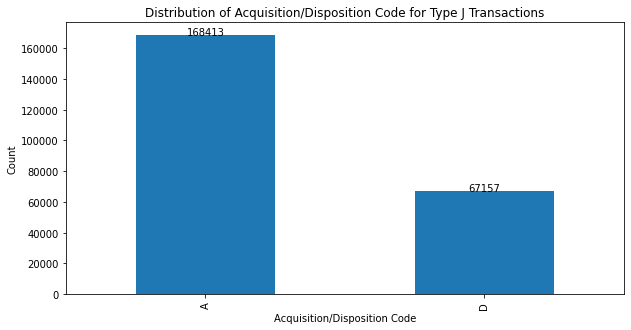

In [18]:
import matplotlib.pyplot as plt

type_j_transactions = trans_df[trans_df['TRANS_CODE'] == 'J']

counts = type_j_transactions['TRANS_ACQUIRED_DISP_CD'].value_counts()

ax = counts.plot(kind='bar', figsize=(10,5))
plt.title('Distribution of Acquisition/Disposition Code for Type J Transactions')
plt.xlabel('Acquisition/Disposition Code')
plt.ylabel('Count')

for i in range(len(counts)):
    ax.text(i, counts[i] + 50, counts[i], ha='center')

plt.show()


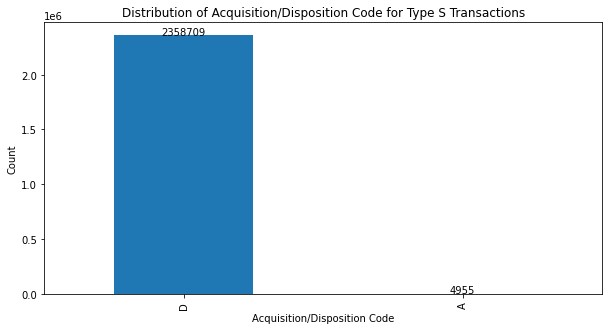

In [19]:
type_s_transactions = trans_df[trans_df['TRANS_CODE'] == 'S']

counts = type_s_transactions['TRANS_ACQUIRED_DISP_CD'].value_counts()

ax = counts.plot(kind='bar', figsize=(10,5))
plt.title('Distribution of Acquisition/Disposition Code for Type S Transactions')
plt.xlabel('Acquisition/Disposition Code')
plt.ylabel('Count')

for i in range(len(counts)):
    ax.text(i, counts[i] + 50, counts[i], ha='center')

plt.show()


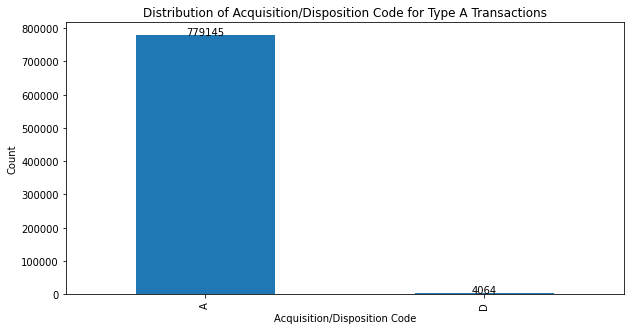

In [20]:
type_a_transactions = trans_df[trans_df['TRANS_CODE'] == 'P']

counts = type_a_transactions['TRANS_ACQUIRED_DISP_CD'].value_counts()

ax = counts.plot(kind='bar', figsize=(10,5))
plt.title('Distribution of Acquisition/Disposition Code for Type A Transactions')
plt.xlabel('Acquisition/Disposition Code')
plt.ylabel('Count')

for i in range(len(counts)):
    ax.text(i, counts[i] + 50, counts[i], ha='center')

plt.show()


In [21]:
trans_df = trans_df.dropna(subset=['ISSUERNAME', 'ISSUERTRADINGSYMBOL'], how='all')

trans_df

,ACCESSION_NUMBER,NONDERIV_TRANS_SK,TRANS_DATE,TRANS_CODE,TRANS_SHARES,TRANS_ACQUIRED_DISP_CD,SHRS_OWND_FOLWNG_TRANS,ISSUERCIK,ISSUERNAME,ISSUERTRADINGSYMBOL
0,0000076605-17-000122,1444527,2017-09-28,S,2000.00,D,67193.00,76605,PATRICK INDUSTRIES INC,PATK
1,0000076605-17-000122,1444526,2017-09-27,S,5000.00,D,69193.00,76605,PATRICK INDUSTRIES INC,PATK
2,0000076605-17-000121,1334551,2017-09-27,S,10000.00,D,362227.00,76605,PATRICK INDUSTRIES INC,PATK
3,0001140361-17-037034,1161256,2017-09-27,F,44043.00,D,52665.00,1535379,"Cloudera, Inc.",CLDR
4,0001140361-17-037033,1158175,2017-09-27,F,12303.00,D,20552.00,1535379,"Cloudera, Inc.",CLDR
...,...,...,...,...,...,...,...,...,...,...
6347159,0001144204-18-000035,1063208,2017-12-28,A,8150.00,A,11174.00,1499961,"Net Element, Inc.",NETE
6347160,0000899243-18-000006,874376,2017-12-29,M,38800.00,A,141842.00,1388658,"iRhythm Technologies, Inc.",IRTC
6347161,0000899243-18-000005,955859,2017-12-31,S,399892.03,D,1249947.99,1589390,Evanston Alternative Opportunities Fund,NONE
6347162,0001062993-18-000002,945747,2017-12-15,P,250000.00,D,7571500.00,1648636,Park Place Energy Inc.,PKPL


In [22]:
trans_df = trans_df[['TRANS_DATE', 'TRANS_CODE', 'TRANS_SHARES', 'ISSUERNAME', 'ISSUERTRADINGSYMBOL']]
trans_df['TRANS_CODE'].value_counts()

trans_types = ['A', 'C', 'G', 'M', 'P', 'X', 'Z',
              'D', 'F', 'S', 'U']
trans_df = trans_df[trans_df['TRANS_CODE'].isin(trans_types)]

trans_df

,TRANS_DATE,TRANS_CODE,TRANS_SHARES,ISSUERNAME,ISSUERTRADINGSYMBOL
0,2017-09-28,S,2000.00,PATRICK INDUSTRIES INC,PATK
1,2017-09-27,S,5000.00,PATRICK INDUSTRIES INC,PATK
2,2017-09-27,S,10000.00,PATRICK INDUSTRIES INC,PATK
3,2017-09-27,F,44043.00,"Cloudera, Inc.",CLDR
4,2017-09-27,F,12303.00,"Cloudera, Inc.",CLDR
...,...,...,...,...,...
6347159,2017-12-28,A,8150.00,"Net Element, Inc.",NETE
6347160,2017-12-29,M,38800.00,"iRhythm Technologies, Inc.",IRTC
6347161,2017-12-31,S,399892.03,Evanston Alternative Opportunities Fund,NONE
6347162,2017-12-15,P,250000.00,Park Place Energy Inc.,PKPL


In [23]:
"""
Trans Code List
 
Value | Meaning
A Grant, award or other acquisition pursuant to Rule 16b-3(d)
C Conversion of derivative security
D Disposition to the issuer of issuer equity securities pursuant to Rule 16b-3(e)
E Expiration of short derivative position
F Payment of exercise price or tax liability by delivering or withholding securities incident to the receipt, exercise or vesting of a security issued in accordance with Rule 16b-3
G Bona fide gift
H Expiration (or cancellation) of long derivative position with value received
I Discretionary transaction in accordance with Rule 16b-3(f) resulting in acquisition or disposition of issuer securities
J Other acquisition or disposition (describe transaction)
L Small acquisition under Rule 16a-6
M Exercise or conversion of derivative security exempted pursuant to Rule 16b-3
O Exercise of out-of-the-money derivative security
P Open market or private purchase of non-derivative or derivative security
S Open market or private sale of non-derivative or derivative security
U Disposition pursuant to a tender of shares in a change of control transaction
W Acquisition or disposition by will or the laws of descent and distribution
X Exercise of in-the-money or at-the-money derivative security
Z Deposit into or withdrawal from voting trust
"""

'\nTrans Code List\n \nValue | Meaning\nA Grant, award or other acquisition pursuant to Rule 16b-3(d)\nC Conversion of derivative security\nD Disposition to the issuer of issuer equity securities pursuant to Rule 16b-3(e)\nE Expiration of short derivative position\nF Payment of exercise price or tax liability by delivering or withholding securities incident to the receipt, exercise or vesting of a security issued in accordance with Rule 16b-3\nG Bona fide gift\nH Expiration (or cancellation) of long derivative position with value received\nI Discretionary transaction in accordance with Rule 16b-3(f) resulting in acquisition or disposition of issuer securities\nJ Other acquisition or disposition (describe transaction)\nL Small acquisition under Rule 16a-6\nM Exercise or conversion of derivative security exempted pursuant to Rule 16b-3\nO Exercise of out-of-the-money derivative security\nP Open market or private purchase of non-derivative or derivative security\nS Open market or private 

In [24]:
"""
Code A, C, G, M, P, X, and Z can be considered as 'buy' transactions.

Code D, F, S, and U can be considered as 'sell' transactions as these codes indicate disposition of shares.

Code J, being open to interpretation ("Other acquisition or disposition (describe transaction)"), is tricky. 
This type of transaction might not fit into the categories of purchase or sale.

14,160 transactions with TRANS_ACQUIRED_DISP_CD 'A' and 9,340 with TRANS_ACQUIRED_DISP_CD 'D'
fall under the TRANS_CODE 'J'.
Given the 'TRANS_ACQUIRED_DISP_CD' ('A' and 'D' codes) explains the nature of 
J type transactions so assuming 'A' as "buy" and 'D' as "sell"
might also be a reasonable approximation. 

But the 422 TRANS_CODE 'S' (sale) transactions with 'TRANS_ACQUIRED_DISP_CD' 'A' (acquisition) and
163 TRANS_CODE 'P' (purchase) transactions with TRANS_ACQUIRED_DISP_CD  'P' (purchase)
denote that this approximation also has possibility to add ambiguity to the 'Net_volume' calculation.

Due to limited ability to retrieve more relavant information from SEC and
field knowledge, the TRANS_CODE 'J' transactions (and TRANS_ACQUIRED_DISP_CD)
will be left out from the 'Net_Volume' calculation 
to avoid possible confusion and inaccuracies and
to simplify the analysis. This might ignore the possible meaningful 
TRANS_CODE 'J' transactions and bring biased analysis in the future.

Codes E, H, I, L, O, and W, from their descriptions, do not seem to directly indicate a buy or a sell transaction, 
so I'll also leave these out of the 'Net_Volume' calculation.
"""

'\nCode A, C, G, M, P, X, and Z can be considered as \'buy\' transactions.\n\nCode D, F, S, and U can be considered as \'sell\' transactions as these codes indicate disposition of shares.\n\nCode J, being open to interpretation ("Other acquisition or disposition (describe transaction)"), is tricky. \nThis type of transaction might not fit into the categories of purchase or sale.\n\n14,160 transactions with TRANS_ACQUIRED_DISP_CD \'A\' and 9,340 with TRANS_ACQUIRED_DISP_CD \'D\'\nfall under the TRANS_CODE \'J\'.\nGiven the \'TRANS_ACQUIRED_DISP_CD\' (\'A\' and \'D\' codes) explains the nature of \nJ type transactions so assuming \'A\' as "buy" and \'D\' as "sell"\nmight also be a reasonable approximation. \n\nBut the 422 TRANS_CODE \'S\' (sale) transactions with \'TRANS_ACQUIRED_DISP_CD\' \'A\' (acquisition) and\n163 TRANS_CODE \'P\' (purchase) transactions with TRANS_ACQUIRED_DISP_CD  \'P\' (purchase)\ndenote that this approximation also has possibility to add ambiguity to the \'Net_vo

In [25]:
trans_types = {
    'A': 1, 
    'C': 1, 
    'G': 1, 
    'M': 1, 
    'P': 1, 
    'X': 1,
    'Z': 1,
    'D': -1,
    'F': -1, 
    'S': -1, 
    'U': -1
}

trans_df['TRANS_TYPE'] = trans_df['TRANS_CODE'].map(trans_types)

trans_df['NET_SHARES'] = trans_df['TRANS_SHARES'] * trans_df['TRANS_TYPE']

trans_df

,TRANS_DATE,TRANS_CODE,TRANS_SHARES,ISSUERNAME,ISSUERTRADINGSYMBOL,TRANS_TYPE,NET_SHARES
0,2017-09-28,S,2000.00,PATRICK INDUSTRIES INC,PATK,-1,-2000.00
1,2017-09-27,S,5000.00,PATRICK INDUSTRIES INC,PATK,-1,-5000.00
2,2017-09-27,S,10000.00,PATRICK INDUSTRIES INC,PATK,-1,-10000.00
3,2017-09-27,F,44043.00,"Cloudera, Inc.",CLDR,-1,-44043.00
4,2017-09-27,F,12303.00,"Cloudera, Inc.",CLDR,-1,-12303.00
...,...,...,...,...,...,...,...
6347159,2017-12-28,A,8150.00,"Net Element, Inc.",NETE,1,8150.00
6347160,2017-12-29,M,38800.00,"iRhythm Technologies, Inc.",IRTC,1,38800.00
6347161,2017-12-31,S,399892.03,Evanston Alternative Opportunities Fund,NONE,-1,-399892.03
6347162,2017-12-15,P,250000.00,Park Place Energy Inc.,PKPL,1,250000.00


In [26]:
features = ['TRANS_DATE', 'ISSUERNAME', 'ISSUERTRADINGSYMBOL', 'NET_SHARES']
trans_df = trans_df[features]
trans_df.set_index('TRANS_DATE', inplace=True)

trans_df

,ISSUERNAME,ISSUERTRADINGSYMBOL,NET_SHARES
TRANS_DATE,,,
2017-09-28,PATRICK INDUSTRIES INC,PATK,-2000.00
2017-09-27,PATRICK INDUSTRIES INC,PATK,-5000.00
2017-09-27,PATRICK INDUSTRIES INC,PATK,-10000.00
2017-09-27,"Cloudera, Inc.",CLDR,-44043.00
2017-09-27,"Cloudera, Inc.",CLDR,-12303.00
...,...,...,...
2017-12-28,"Net Element, Inc.",NETE,8150.00
2017-12-29,"iRhythm Technologies, Inc.",IRTC,38800.00
2017-12-31,Evanston Alternative Opportunities Fund,NONE,-399892.03


In [27]:
import yfinance as yf

fb = yf.download('META', start='2021-01-01', end='2023-03-31')

fb

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300
...,...,...,...,...,...,...
2023-03-24,205.179993,207.580002,203.550003,206.009995,206.009995,27716400
2023-03-27,204.809998,205.860001,201.360001,202.839996,202.839996,18527200
2023-03-28,200.149994,201.029999,197.899994,200.679993,200.679993,19127300


In [28]:
fb_insider = trans_df[trans_df['ISSUERTRADINGSYMBOL'].isin(['META', 'FB'])]
fb_insider = fb_insider.sort_values('TRANS_DATE')
fb_insider = fb_insider[['NET_SHARES']]
fb_insider

,NET_SHARES
TRANS_DATE,
1999-06-30,0.0
2000-03-30,0.0
2010-03-30,10000.0
2011-02-01,7500.0
2012-05-17,-5243185.0
...,...
2023-02-28,-393.0
2023-03-07,-393.0
2023-03-14,-393.0


In [29]:
fb_insider = fb_insider.groupby(fb_insider.index).sum()
fb_insider = fb_insider.rename(columns={'NET_SHARES': 'NET_VOLUME'})

fb_insider

,NET_VOLUME
TRANS_DATE,
1999-06-30,0.0
2000-03-30,0.0
2010-03-30,10000.0
2011-02-01,7500.0
2012-05-17,-24324886.0
...,...
2023-02-28,-393.0
2023-03-07,-393.0
2023-03-14,-393.0


In [30]:
import yfinance as yf

fb = yf.download('META', start='2021-01-01', end='2023-03-31')

fb

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,274.779999,275.000000,265.200012,268.940002,268.940002,15106100
2021-01-05,268.290009,272.399994,268.209991,270.970001,270.970001,9871600
2021-01-06,262.000000,267.750000,260.010010,263.309998,263.309998,24354100
2021-01-07,265.899994,271.609985,264.779999,268.739990,268.739990,15789800
2021-01-08,268.309998,268.950012,263.179993,267.570007,267.570007,18528300
...,...,...,...,...,...,...
2023-03-24,205.179993,207.580002,203.550003,206.009995,206.009995,27716400
2023-03-27,204.809998,205.860001,201.360001,202.839996,202.839996,18527200
2023-03-28,200.149994,201.029999,197.899994,200.679993,200.679993,19127300


In [31]:
fb = fb[['Close']]
fb

,Close
Date,
2021-01-04,268.940002
2021-01-05,270.970001
2021-01-06,263.309998
2021-01-07,268.739990
2021-01-08,267.570007
...,...
2023-03-24,206.009995
2023-03-27,202.839996
2023-03-28,200.679993


In [32]:
dates = pd.date_range('2021-01-01', '2023-03-30')

date_df = pd.DataFrame(index=dates)

fb_insider = pd.merge(date_df, fb_insider, how='left', left_index=True, right_index=True)
fb_insider = fb_insider.fillna(0)

fb = pd.merge(date_df, fb, how='left', left_index=True, right_index=True)
fb.fillna(method='ffill', inplace=True)
fb.fillna(method='bfill', inplace=True)

fb_insider, fb

(            NET_VOLUME
 2021-01-01         0.0
 2021-01-02         0.0
 2021-01-03         0.0
 2021-01-04    -11000.0
 2021-01-05    -11310.0
 ...                ...
 2023-03-26         0.0
 2023-03-27         0.0
 2023-03-28      -393.0
 2023-03-29         0.0
 2023-03-30         0.0
 
 [819 rows x 1 columns],
                  Close
 2021-01-01  268.940002
 2021-01-02  268.940002
 2021-01-03  268.940002
 2021-01-04  268.940002
 2021-01-05  270.970001
 ...                ...
 2023-03-26  206.009995
 2023-03-27  202.839996
 2023-03-28  200.679993
 2023-03-29  205.350006
 2023-03-30  207.839996
 
 [819 rows x 1 columns])

In [33]:
fb_df.isnull().sum()

NameError: name 'fb_df' is not defined

In [ ]:
fb_df = pd.merge(fb_insider, fb, how='left', left_index=True, right_index=True)
fb_df

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fb_df['NET_VOLUME_SUM'] = fb_df['NET_VOLUME'].cumsum()

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Accumulated Net Volume', color=color)
ax1.plot(fb_df.index, fb_df['NET_VOLUME_SUM'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax1.yaxis.set_major_formatter(formatter)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Closing Price', color=color)
ax2.plot(fb_df.index, fb_df['Close'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = fb_df['NET_VOLUME'].values.reshape(-1,1)
y = fb_df['Close'].values

X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-Squared:', r2)

In [ ]:
"""
1. Mean Squared Error (MSE): 7579.34
The predicted values are around 7579 MSE away from the actual price of the company's stock. 
The error doesn't be interpreted in dollar terms.

2. Root Mean Squared Error (RMSE): 87.06
Each prediction on average is 87 dollars away from the actual price. 
The price range within the period (2021 - 2023 march) was between approximately 
50 and 400 dollars.

3. Mean Absolute Error (MAE): 75.65
The model's predictions were $75.65 away from the actual prices on average.

4. R-Squared (R²): -0.0877
The negative R-Squared suggests the predicted values are irregular 
or invalid.
"""

In [ ]:
import matplotlib.pyplot as plt

y_test_df = pd.DataFrame(y_test, index=fb_df.tail(len(y_test)).index, columns=['Close'])
y_pred_df = pd.DataFrame(y_pred, index=fb_df.tail(len(y_test)).index, columns=['Predicted Close'])

plt.figure(figsize=(14,7))
plt.plot(y_test_df.index, y_test_df['Close'], color='blue', label='Actual')
plt.plot(y_pred_df.index, y_pred_df['Predicted Close'], color='red', label='Predicted')
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
